In [14]:
# Dependencies and Setup
%matplotlib notebook
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [15]:
# Google file path/ read data
google_path = "Resources/2020_US_Region_Mobility_Report.csv"
google_data = pd.read_csv(google_path)
google_data.head()

/Users/QueenV/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,US,United States,NaN,NaN,NaN,NaN,NaN,2020-02-15,6.0,2.0,15.0,3.0,2.0,-1.0
1,US,United States,NaN,NaN,NaN,NaN,NaN,2020-02-16,7.0,1.0,16.0,2.0,0.0,-1.0
2,US,United States,NaN,NaN,NaN,NaN,NaN,2020-02-17,6.0,0.0,28.0,-9.0,-24.0,5.0
3,US,United States,NaN,NaN,NaN,NaN,NaN,2020-02-18,0.0,-1.0,6.0,1.0,0.0,1.0
4,US,United States,NaN,NaN,NaN,NaN,NaN,2020-02-19,2.0,0.0,8.0,1.0,1.0,0.0


In [16]:
# Create DataFrame to restrict data to LA, SF, and US
refined_data = google_data.loc[(google_data["sub_region_2"] == "San Francisco County")|
                              (google_data["sub_region_2"] == "Los Angeles County")|
                               (google_data["iso_3166_2_code"] == "US-CA")
                              ]
refined_data.head()

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
35177,US,United States,California,NaN,NaN,US-CA,NaN,2020-02-15,1.0,1.0,19.0,1.0,-1.0,0.0
35178,US,United States,California,NaN,NaN,US-CA,NaN,2020-02-16,5.0,0.0,31.0,1.0,-1.0,-1.0
35179,US,United States,California,NaN,NaN,US-CA,NaN,2020-02-17,9.0,1.0,44.0,-12.0,-38.0,8.0
35180,US,United States,California,NaN,NaN,US-CA,NaN,2020-02-18,0.0,0.0,16.0,3.0,0.0,0.0
35181,US,United States,California,NaN,NaN,US-CA,NaN,2020-02-19,0.0,0.0,13.0,1.0,0.0,0.0


In [17]:
# Drop columns in DataFrame not relevent to analysis/ rename columns
data_clean = refined_data.drop(columns = ["sub_region_1","metro_area", "census_fips_code", "country_region_code", "country_region", "iso_3166_2_code"])
data_clean.head()

,sub_region_2,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
35177,NaN,2020-02-15,1.0,1.0,19.0,1.0,-1.0,0.0
35178,NaN,2020-02-16,5.0,0.0,31.0,1.0,-1.0,-1.0
35179,NaN,2020-02-17,9.0,1.0,44.0,-12.0,-38.0,8.0
35180,NaN,2020-02-18,0.0,0.0,16.0,3.0,0.0,0.0
35181,NaN,2020-02-19,0.0,0.0,13.0,1.0,0.0,0.0


In [18]:
# Renaming columns
data_clean.rename(columns = {
                             "sub_region_2": "Region",
                             "date": "Date",
                             "retail_and_recreation_percent_change_from_baseline": "Retail and Recreation",
                             "grocery_and_pharmacy_percent_change_from_baseline": "Grocery and Pharmacy",
                             "parks_percent_change_from_baseline": "Parks",
                             "transit_stations_percent_change_from_baseline": "Transit Stations",
                             "workplaces_percent_change_from_baseline": "Workplaces",
                             "residential_percent_change_from_baseline":"Residential"
                             }, inplace=True)
len(data_clean)

672

In [19]:
# Fill NaN value in column with California
data_clean["Region"] = data_clean["Region"].fillna("California")
data_clean

,Region,Date,Retail and Recreation,Grocery and Pharmacy,Parks,Transit Stations,Workplaces,Residential
35177,California,2020-02-15,1.0,1.0,19.0,1.0,-1.0,0.0
35178,California,2020-02-16,5.0,0.0,31.0,1.0,-1.0,-1.0
35179,California,2020-02-17,9.0,1.0,44.0,-12.0,-38.0,8.0
35180,California,2020-02-18,0.0,0.0,16.0,3.0,0.0,0.0
35181,California,2020-02-19,0.0,0.0,13.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...
43588,San Francisco County,2020-09-21,NaN,NaN,NaN,NaN,-67.0,25.0
43589,San Francisco County,2020-09-22,NaN,NaN,NaN,NaN,-66.0,25.0
43590,San Francisco County,2020-09-23,NaN,NaN,NaN,NaN,-65.0,25.0
43591,San Francisco County,2020-09-24,NaN,NaN,NaN,NaN,-65.0,26.0


In [20]:
# Tidy data to long form 
data_long = data_clean.melt(id_vars=["Region", "Date"], var_name="Activity Type", value_name="Activity")
data_long.head()
len(data_long)

4032

In [21]:
# DataFrame for SF vs. LA
sf_la = data_long.loc[(data_long["Region"] == "San Francisco County")|
                              (data_long["Region"] == "Los Angeles County")]
sf_la

,Region,Date,Activity Type,Activity
224,Los Angeles County,2020-02-15,Retail and Recreation,1.0
225,Los Angeles County,2020-02-16,Retail and Recreation,4.0
226,Los Angeles County,2020-02-17,Retail and Recreation,7.0
227,Los Angeles County,2020-02-18,Retail and Recreation,-1.0
228,Los Angeles County,2020-02-19,Retail and Recreation,-1.0
...,...,...,...,...
4027,San Francisco County,2020-09-21,Residential,25.0
4028,San Francisco County,2020-09-22,Residential,25.0
4029,San Francisco County,2020-09-23,Residential,25.0
4030,San Francisco County,2020-09-24,Residential,26.0


<IPython.core.display.Javascript object>


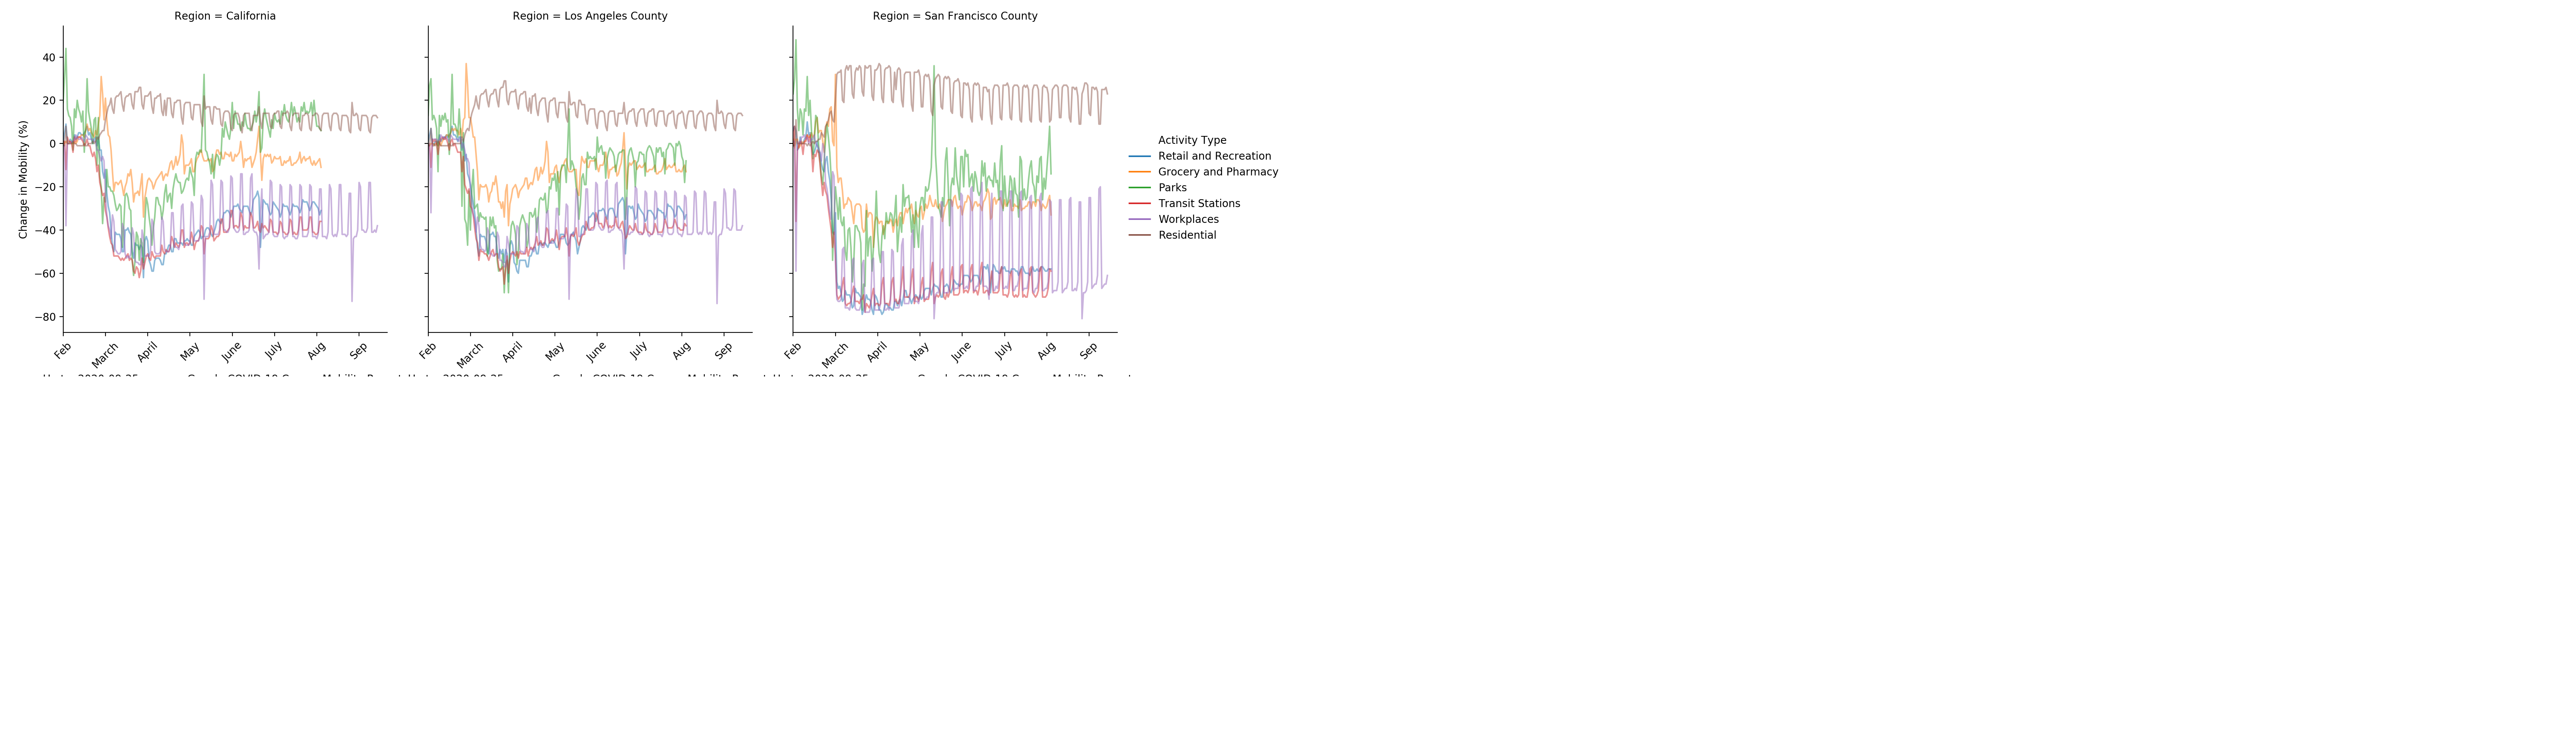

In [9]:
# Plot data

plot = sns.relplot(data=data_long, x="Date", y="Activity", 
                   col="Region", hue="Activity Type", kind="line", alpha=.5)


plot.set_axis_labels("Up to: 2020-09-25, source: Google COVID-19 Comm. Mobility Reports", "Change in Mobility (%)")
plot.set(xlim=(0, 230), xticks=[0,30,60,90,120,150,180,210])
plot.set_xticklabels(["Feb", "March", "April", "May", "June", "July", "Aug", "Sep"], rotation=45)

plot.savefig("Output/google_trend_1.png")


<IPython.core.display.Javascript object>


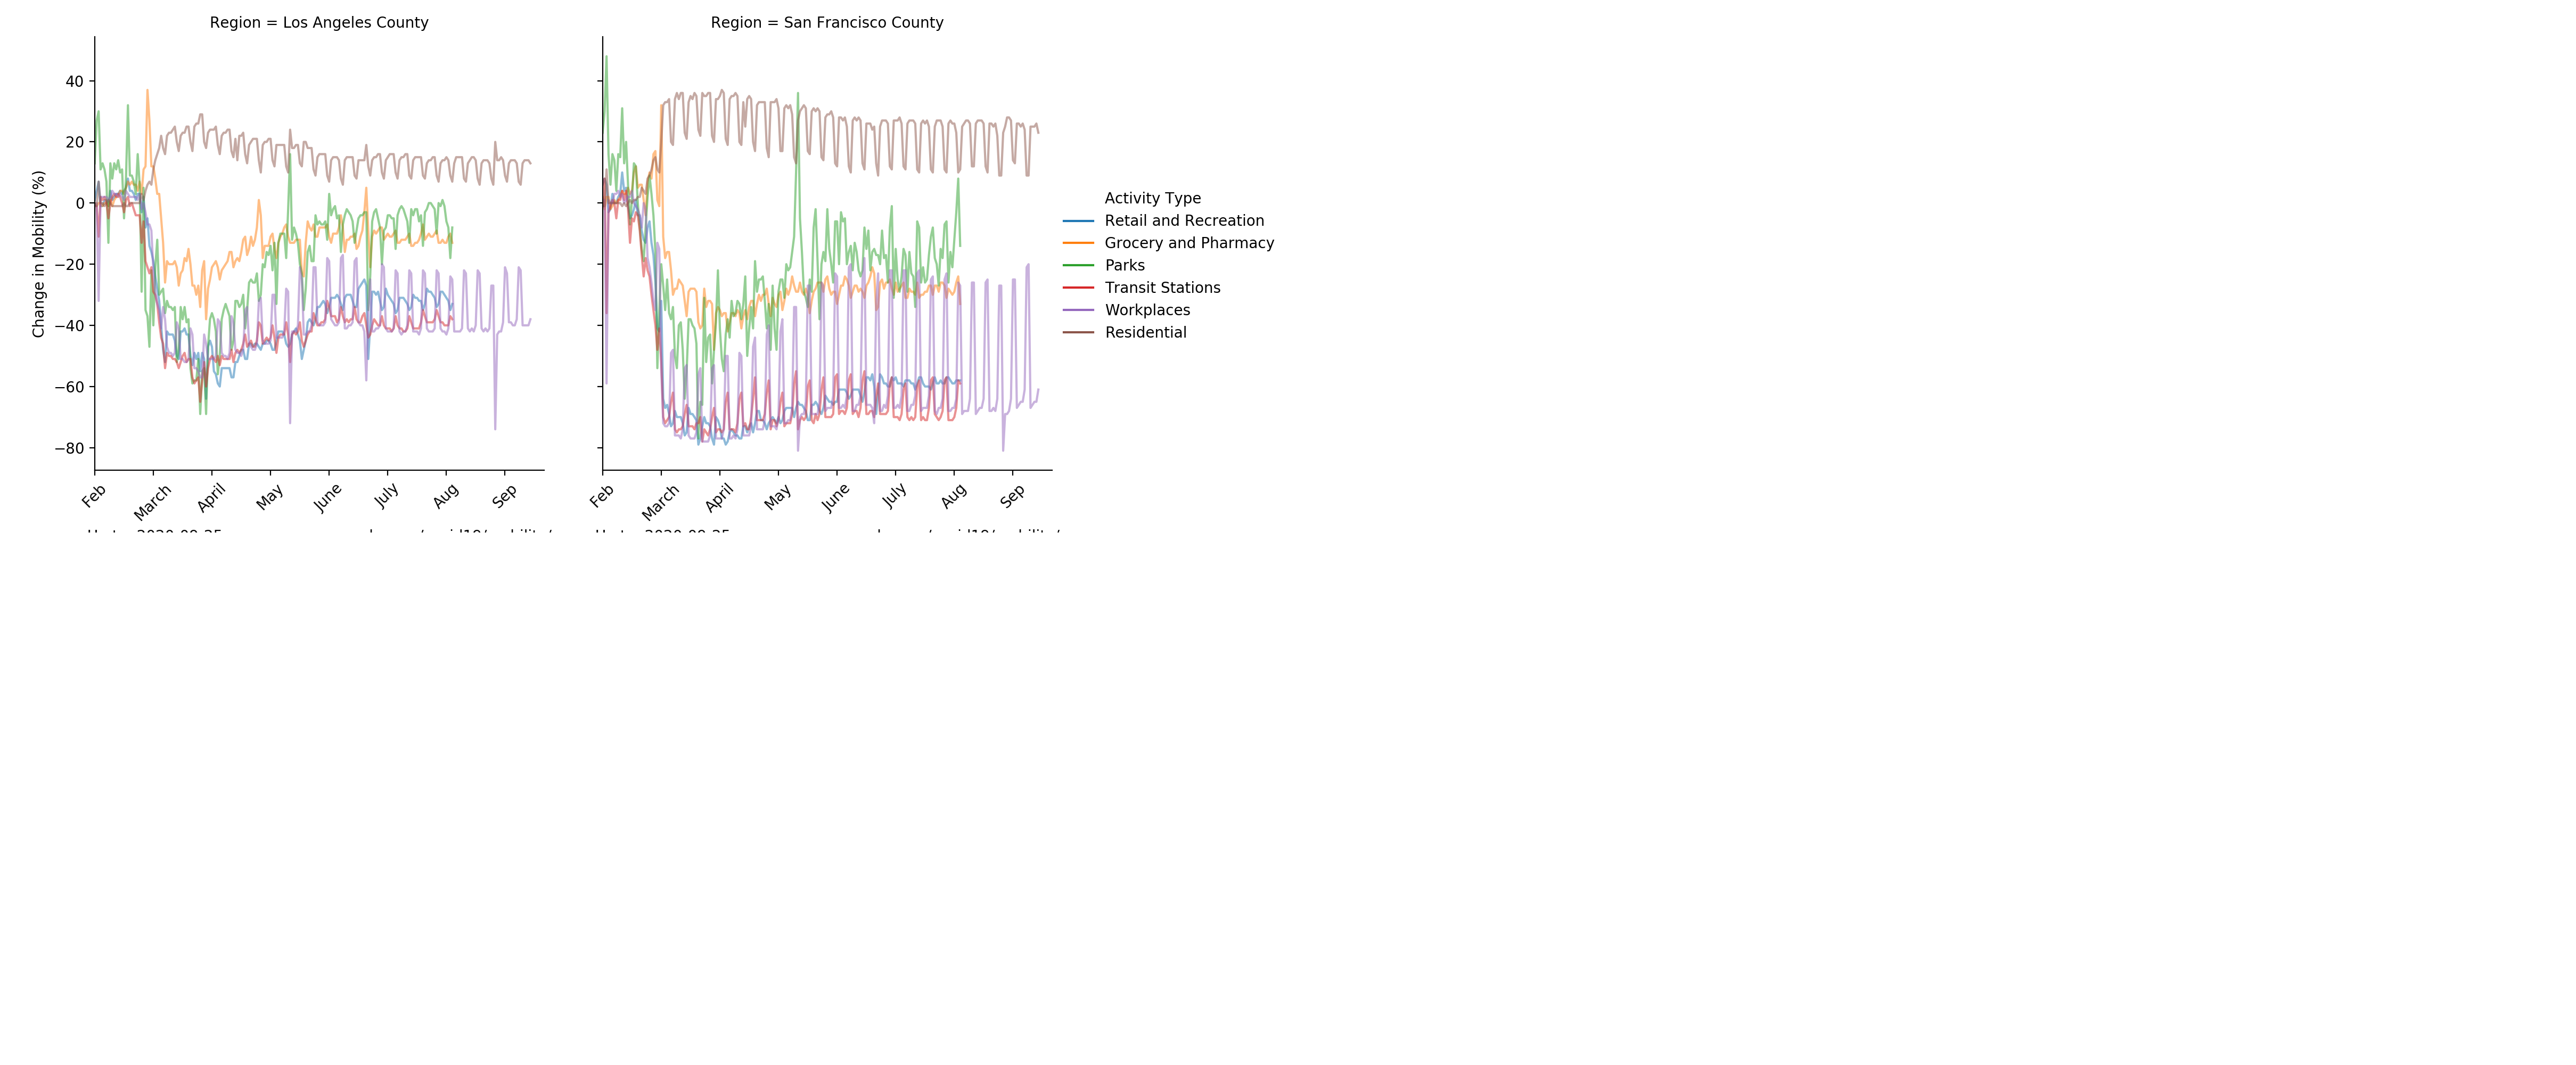

In [11]:
plot = sns.relplot(data=sf_la, x="Date", y="Activity", 
                   col="Region", hue="Activity Type", kind="line", alpha=.5)


plot.set_axis_labels("Up to: 2020-09-25, source: www.google.com/covid19/mobility/", "Change in Mobility (%)")
plot.set(xlim=(0, 230), xticks=[0,30,60,90,120,150,180,210])
plot.set_xticklabels(["Feb", "March", "April", "May", "June", "July", "Aug", "Sep"], rotation=45)

plot.savefig("Output/google_trend_2.png")

In [10]:
# SF-LA Retail and recreation / grocery and pharmacy DataFrame
retail_df = sf_la.loc[(sf_la["Activity Type"] == "Retail and Recreation")|
                              (sf_la["Activity Type"] == "Grocery and Pharmacy")
                              ]

<IPython.core.display.Javascript object>


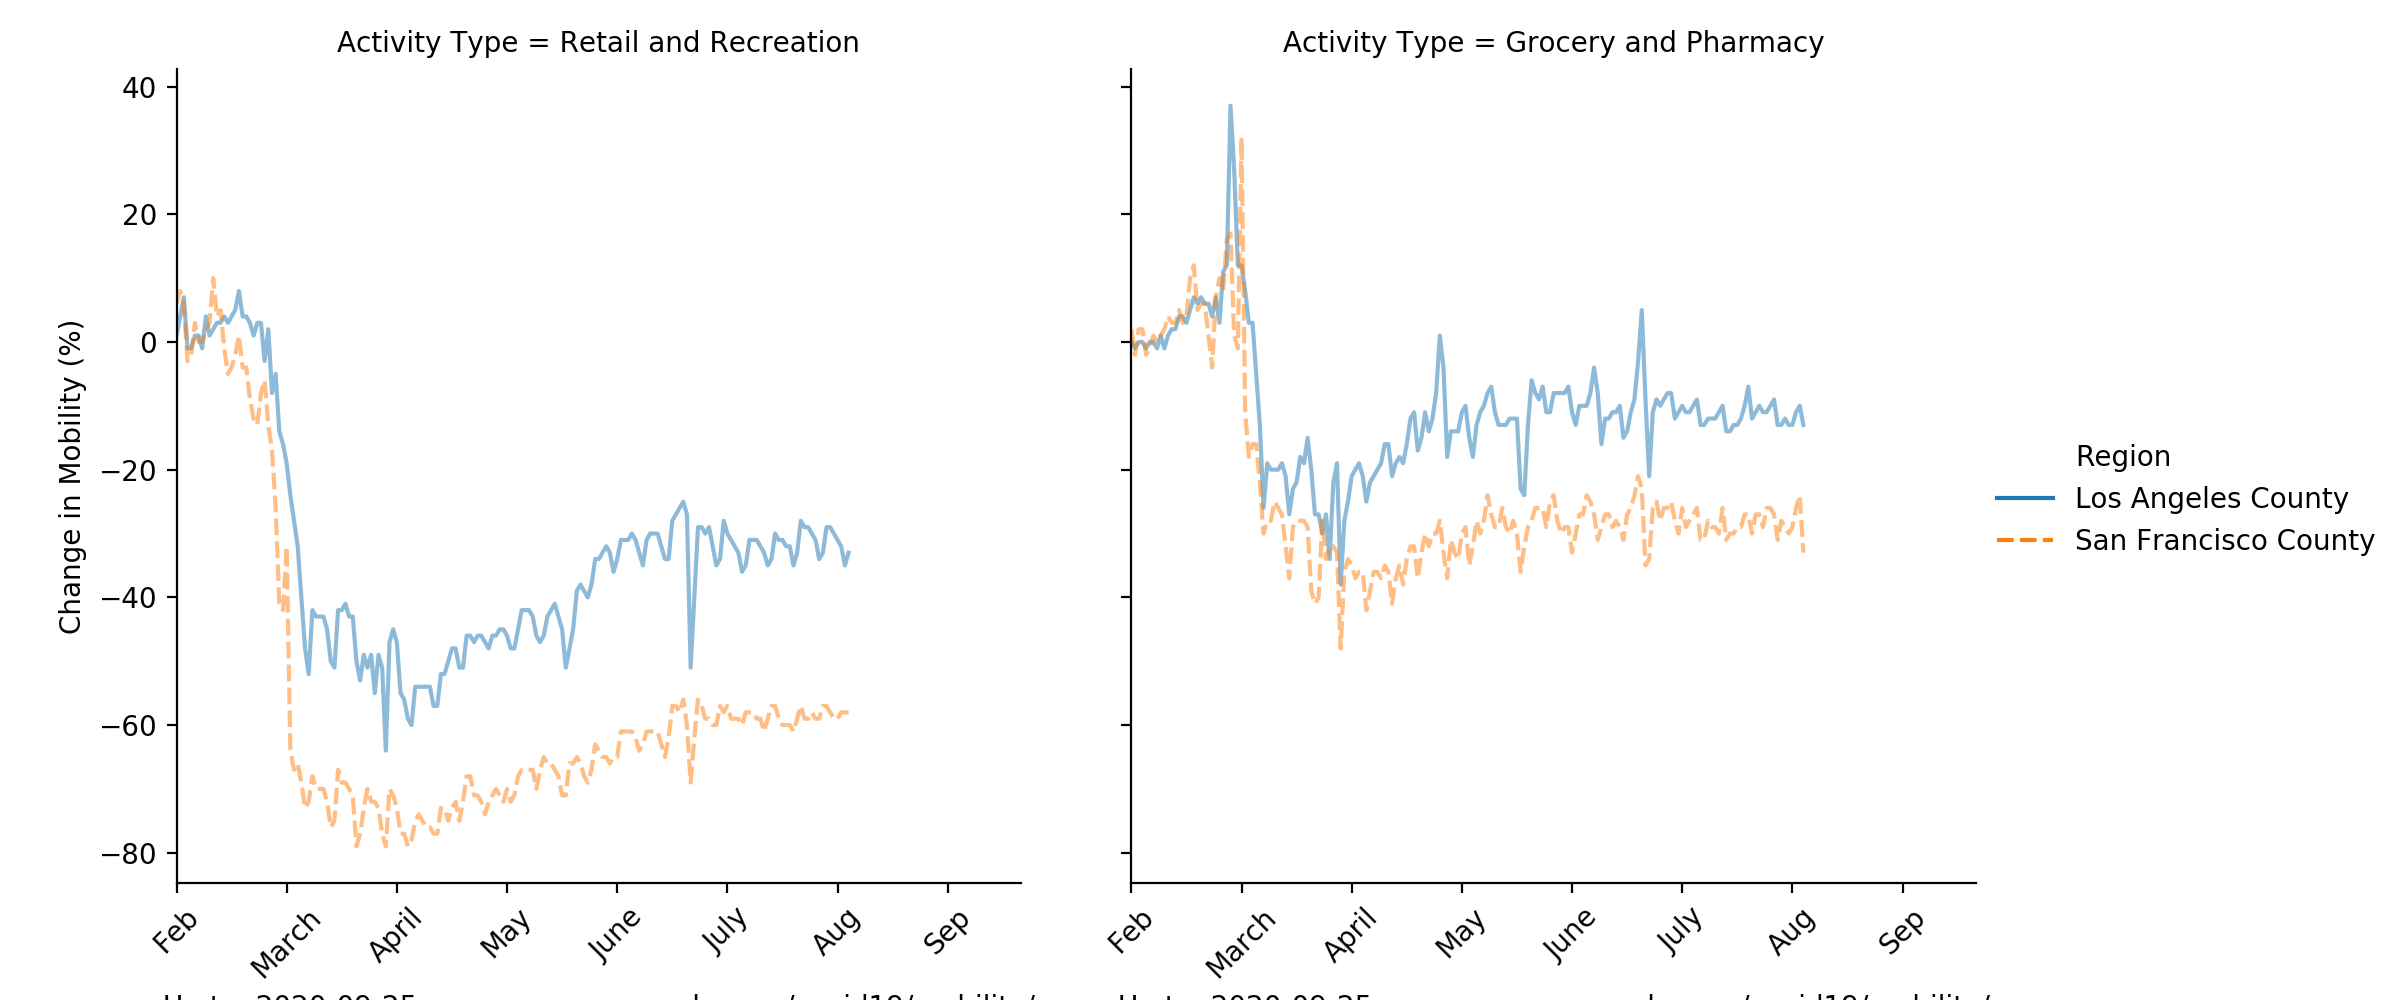

In [22]:
# Plot
plot = sns.relplot(data=retail_df, x="Date", y="Activity", 
                   col="Activity Type", hue="Region", kind="line", style="Region", alpha=.5)


plot.set_axis_labels("Up to: 2020-09-25, source: www.google.com/covid19/mobility/", "Change in Mobility (%)")
plot.set(xlim=(0, 230), xticks=[0,30,60,90,120,150,180,210])
plot.set_xticklabels(["Feb", "March", "April", "May", "June", "July", "Aug", "Sep"], rotation=45)

plot.savefig("Output/google_trend_3.png", dpi = 400)

In [12]:
# SF-LA Workplaces and residential Data Frame
work_df = sf_la.loc[(sf_la["Activity Type"] == "Workplaces")|
                              (sf_la["Activity Type"] == "Residential")
                              ]

<IPython.core.display.Javascript object>


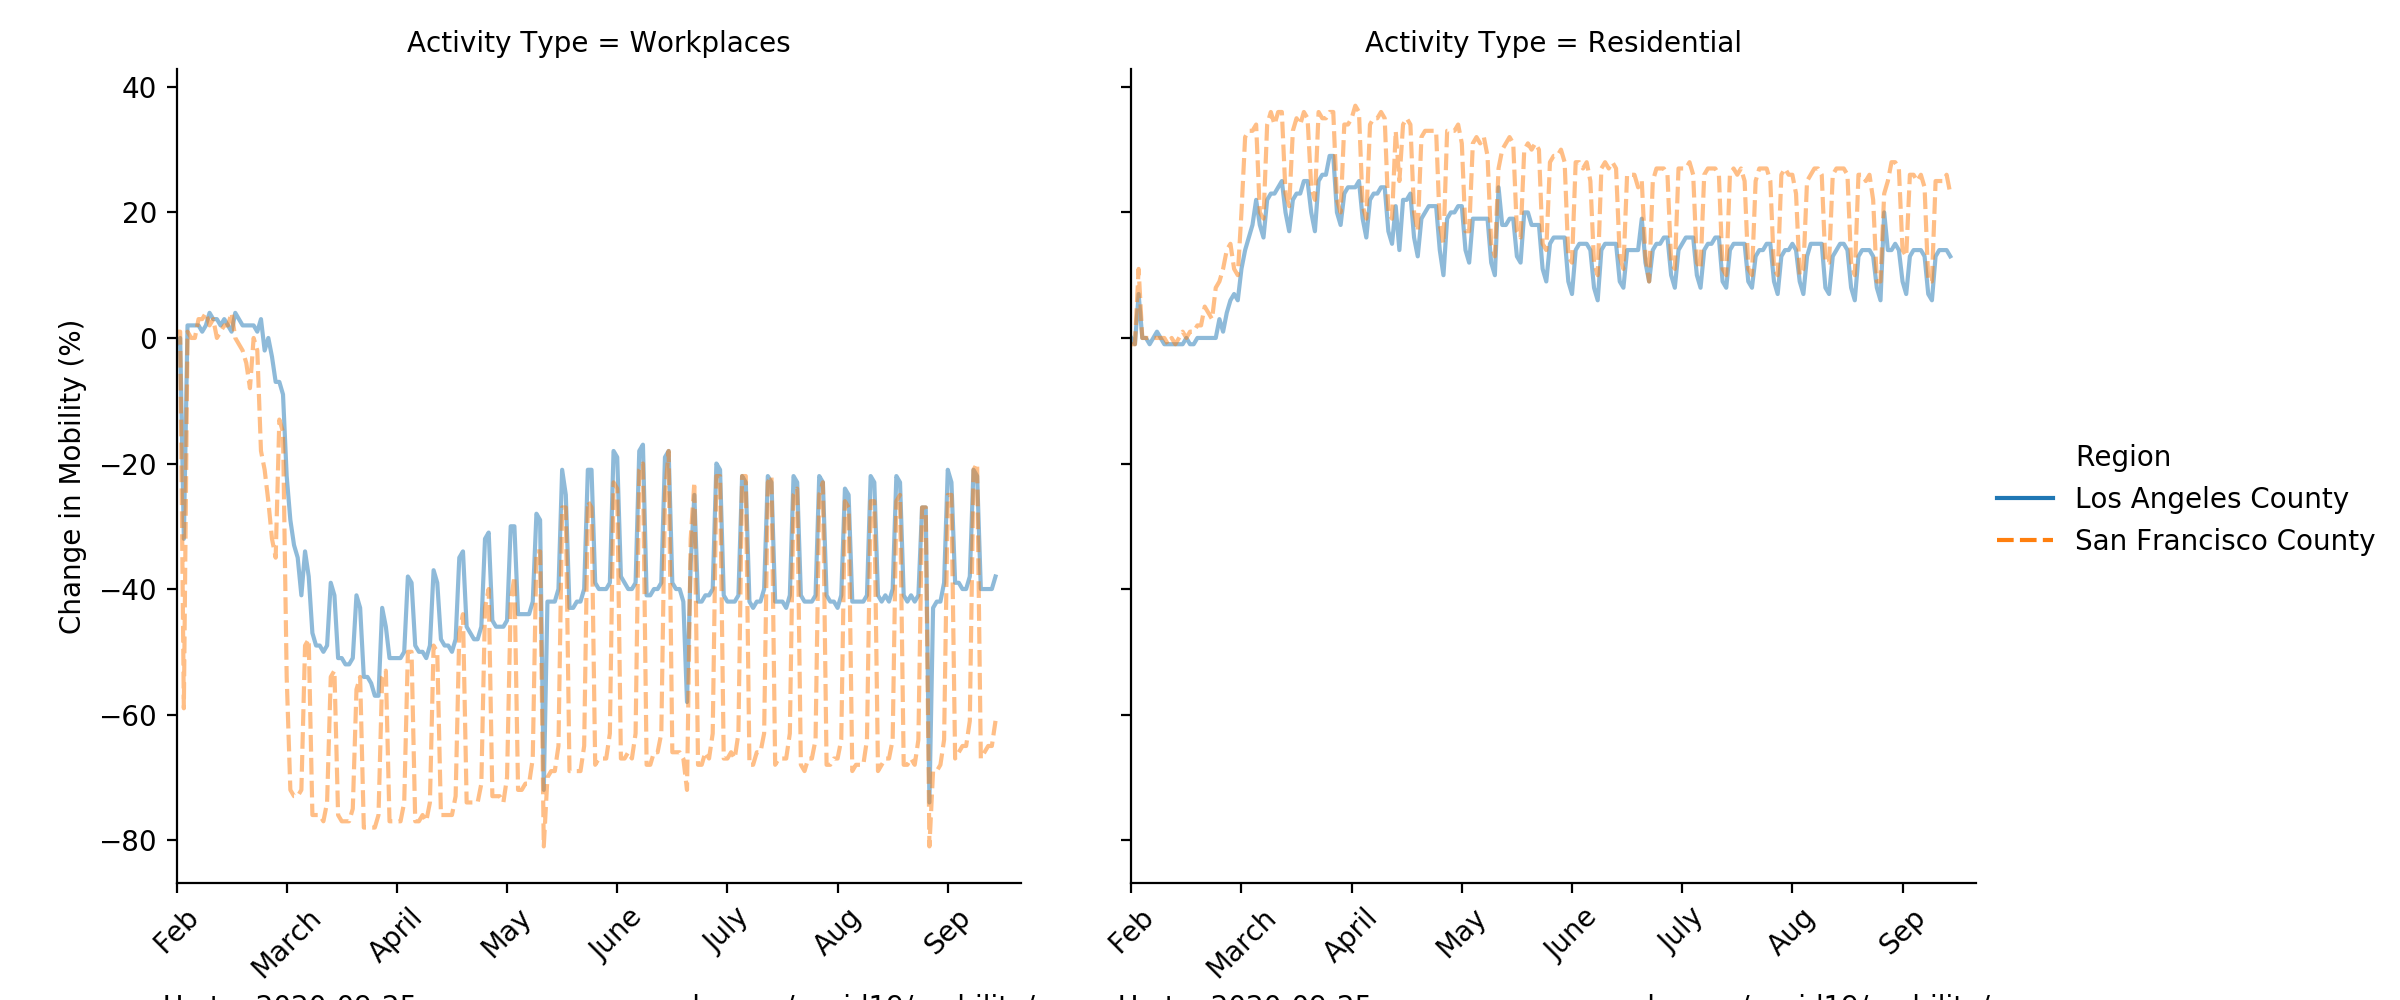

In [23]:
# Plot 
plot = sns.relplot(data=work_df, x="Date", y="Activity", 
                   col="Activity Type", hue="Region", kind="line", style="Region", alpha=.5)


plot.set_axis_labels("Up to: 2020-09-25, source: www.google.com/covid19/mobility/", "Change in Mobility (%)")
plot.set(xlim=(0, 230), xticks=[0,30,60,90,120,150,180,210])
plot.set_xticklabels(["Feb", "March", "April", "May", "June", "July", "Aug", "Sep"], rotation=45)

plot.savefig("Output/google_trend_4.png", dpi = 400)